In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
data = np.array([(1, 4), (1, 3), (0, 4), (5, 1), (6, 2), (4, 0)])

data

array([[1, 4],
       [1, 3],
       [0, 4],
       [5, 1],
       [6, 2],
       [4, 0]])

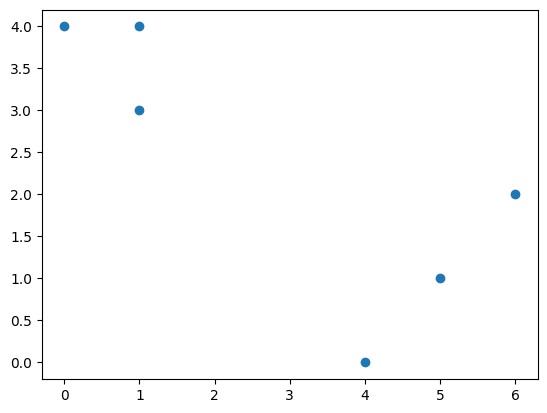

In [21]:
# Plotting the points
plt.scatter(data[:, 0], data[:, 1]) # Scatter plot requires x and y arguments
plt.show()

In [22]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(np.square(x1-x2)))


# K-means clustering class

class K_Means:
    def __init__(self, k=2, max_iters = 25, plot_steps=False): # plot_steps -> if we want to plot the different steps of the cluster
        self.k = k
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        
        self.clusters = [[] for _ in range(self.k)] # It will store the list of sample indices for each cluster
        
        # Variable to store the centroids
        self.centroids = []
        
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # Initialising the Centroids
        
        # To choose random centroid use below
        # random_sample_idxs = np.random.choice(self.n_samples, self.k, replace=False)
        # self.centroids = [self.X[idx] for idx in random_sample_idxs] 
        
        # Choosing centroids manually
        self.centroids = [[0, 4], [6, 2]]
        
        # Optimizing the Clusters
        for _ in range(self.max_iters):
            
            # Assign samples to closest centroids (to create a cluster)
            self.clusters = self._create_clusters(self.centroids) # calling the function to create a cluster
            
            
            # Plotting the centroids and the clusters
            if self.plot_steps:
                self.plot()
            
            
            # Calculating new centroids
            old_centroids = self.centroids #Storing the Old centroids
            self.centroids = self._get_centroids(self.clusters) # calling the function to get new centroids
            
            
            # Checking if the old and the new centroids converge (same)
            if self._is_converged(old_centroids, self.centroids): # calling the function to check if the centroids converge
                break
                
            
            # Plotting the centroids and the clusters
            if self.plot_steps:
                self.plot()
      
        
        # Returning the CLuster labels
        return self._get_cluster_labels(self.clusters) # calling the function to return the clusters with labels
        
        
        
    # Function to get the clusters with labels
    
    def _get_cluster_labels(self, clusters):
        
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples, dtype=int) # Creating an empty array of the size of n_samplee
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
                
        return labels
    
    
    # Function to create a cluster
            
    def _create_clusters(self, centroids):
        
        # Assigning Samples to the closeset centroids
        clusters = [[] for _ in range(self.k)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    
    def _closest_centroid(self, sample, centroids):
        
        #determining the distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    
    # Function to get new centroids
    
    def _get_centroids(self, clusters):
        #assign the mean value of clusters to centroids
        centroids = np.zeros((self.k, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    
    # Function to check if the centroids converge
    
    def _is_converged(self, centroids_old, centroids):
        #Distances between old and new centroids, for all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.k)]
        return sum(distances) == 0
    
    # Function to plot the centroids and the clusters
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        
        for centroid in self.centroids:
            ax.scatter(*centroid, marker="x", color="black", linewidth=2)
            
        plt.show()
        

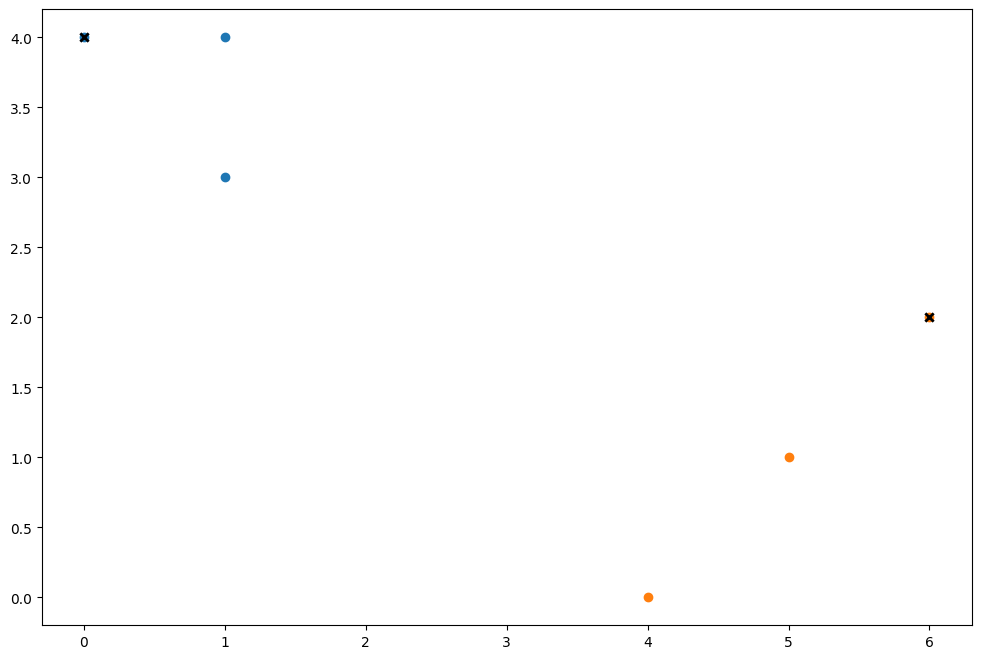

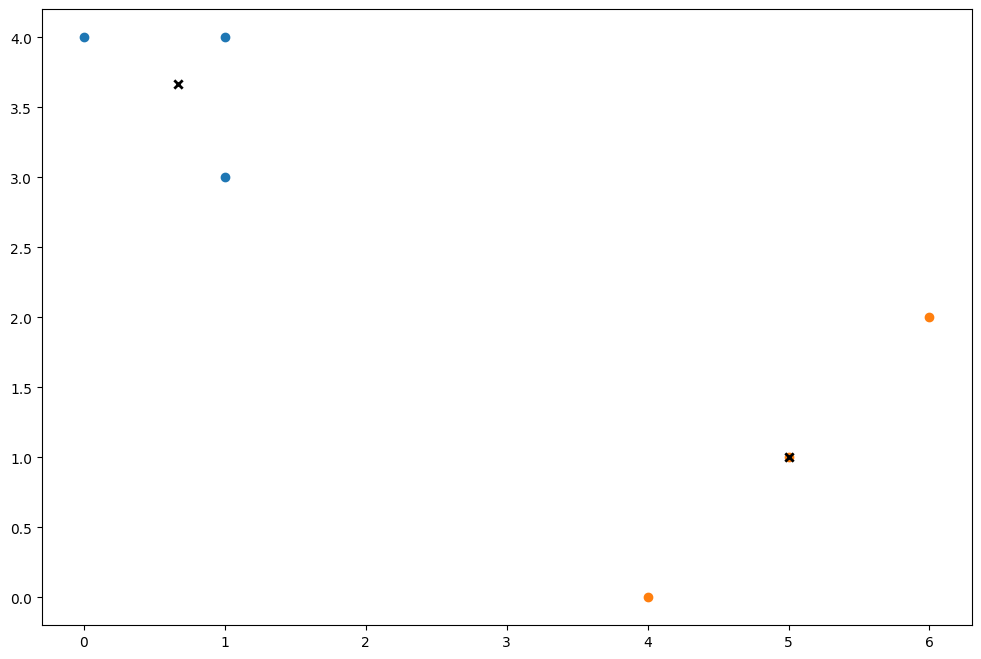

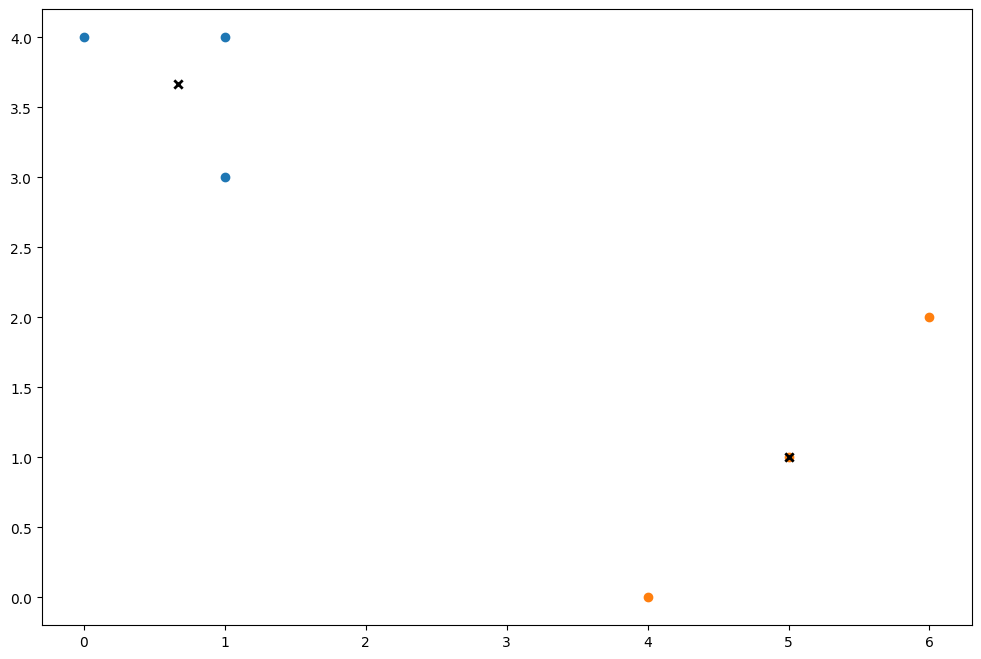

Final Cluster Labels: [0 0 0 1 1 1]
Final Centroids: [[0.66666667 3.66666667]
 [5.         1.        ]]


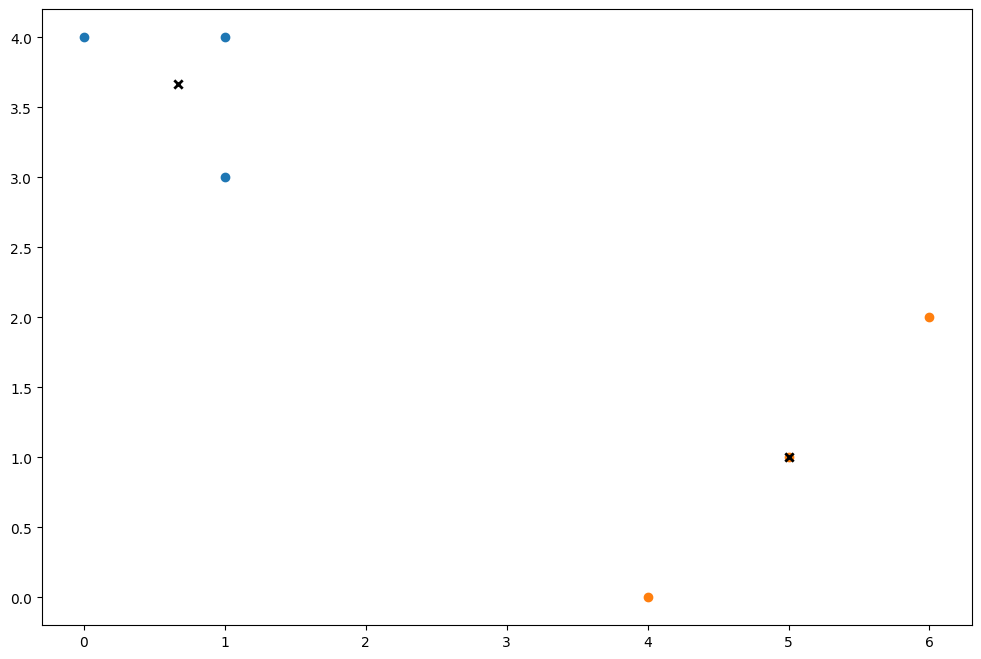

In [18]:
# Create an instance of the K_Means class
kmeans = K_Means(k=2, max_iters=25, plot_steps=True)

labels = kmeans.predict(data)
print("Final Cluster Labels:", labels)
print("Final Centroids:", kmeans.centroids)
kmeans.plot()